# merge_all

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 11823 12224
download_chandra_obsid 11823,12224 --exclude vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      157 Mb  ####################            4 s  43410.0 kb/s
  evt2     fits       61 Mb  ####################            3 s  24666.8 kb/s
  asol     fits       13 Mb  ####################          < 1 s  33068.4 kb/s
  mtl      fits        3 Mb  ####################          < 1 s  21116.4 kb/s
  stat     fits        2 Mb  ####################          < 1 s  16943.9 kb/s
  aqual    fits      972 Kb  ####################          < 1 s  28675.3 kb/s
  cntr_img jpg       476 Kb  ####################          < 1 s  19936.1 kb/s
  bias     fits      441 Kb  ####################          < 1 s  19795.6 kb/s
  bias     fits      438 Kb  ####################          < 1 s  18972.0 kb/s
  bias     fits      436 Kb  ####################          < 1 s  18690.8 kb/s
  bias     fits      431 Kb  ####################    

In [3]:
chandra_repro 11823,12224 outdir=


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/merge_all/11823'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/merge_all/11823/repro/acisf11823_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...

Cleaning up intermediate files

The data have been reprocessed.
Start your analysis with the new products in
/proj/sds/Staff/kjg/Threads/merge_all/11823/repro


Processing input directory '/proj/sds/Staff/kjg/Threads/merge_all/12224'

No boresight correction update to asol file is needed.
Resetting aft

## merge_obs


In [4]:
merge_obs 11823,12224 rcw103/ clob+

Running merge_obs
Version: 23 February 2021

Found 11823/repro/acisf11823_repro_evt2.fits
Found 12224/repro/acisf12224_repro_evt2.fits
Verifying 2 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=16h 17m 38.237s Dec=-51d 1' 24.66"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 11823 2010-06-01  62.5 ACIS-0123   -233.587 153.4   0.1   +56
2 12224 2010-06-27  17.8 ACIS-0123   -233.587 153.4   0.1  -124

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to rcw103/merged_evt.fits

Calculating the output grid

The merged images will have 368 by 367 pixels, a pixel size of 3.936 arcsec,
    and cover x=2648.5:5592.5:8, y=2560.5:5496.5:8.

Creating the fluxed images for 2 obs

[1] 39712
[1]+  Done                    ds9 -scale log -zoom 2 -cmap b rcw103/broad_flux.img -saveimage png ds9_01.png


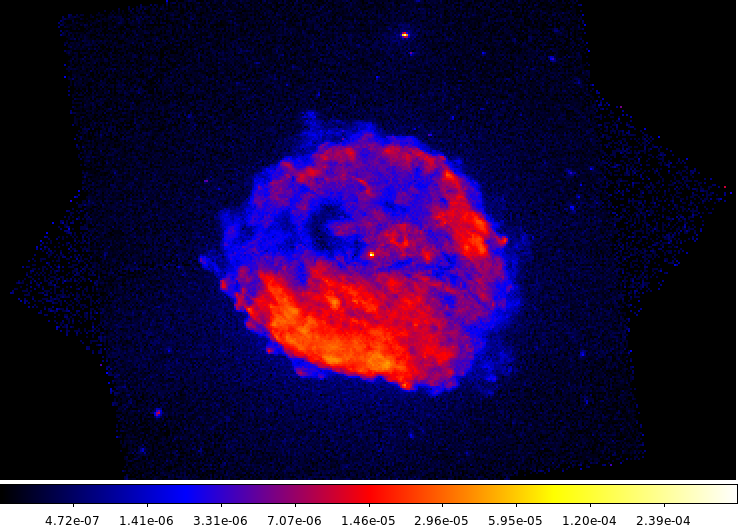

In [5]:
ds9 -scale log -zoom 2 -cmap b rcw103/broad_flux.img \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

[1] 39766
[1]+  Done                    ds9 -scale log -smooth -cmap b rcw103/broad_thresh.img rcw103/broad_thresh.expmap -scale linear -saveimage png ds9_02.png


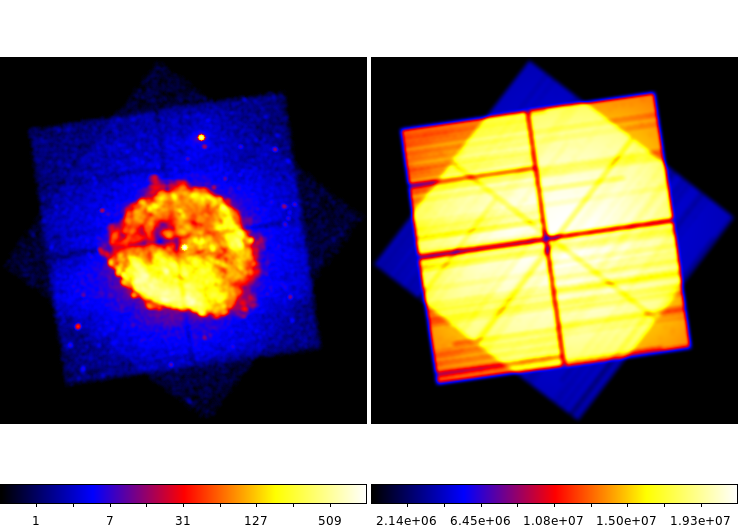

In [6]:
ds9 -scale log -smooth -cmap b \
  rcw103/broad_thresh.img rcw103/broad_thresh.expmap -scale linear \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

## Using reproject_obs and flux_obs

In [7]:
reproject_obs 11823,12224 rcw103_manual/ clob+

Running reproject_obs
Version: 05 November 2020

Found 11823/repro/acisf11823_repro_evt2.fits
Found 12224/repro/acisf12224_repro_evt2.fits
Verifying 2 observations.
Calculating new tangent point.
New tangent point: RA=16h 17m 38.237s Dec=-51d 1' 24.66"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 11823 2010-06-01  62.5 ACIS-0123   -233.587 153.4   0.1   +56
2 12224 2010-06-27  17.8 ACIS-0123   -233.587 153.4   0.1  -124

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to rcw103_manual/merged_evt.fits

The following files were created:

The reprojected event files:
     rcw103_manual/11823_reproj_evt.fits
     rcw103_manual/12224_reproj_evt.fits

The merged event file:
     rcw103_manual/merged_evt.fits

   should not be use

In [8]:
flux_obs "rcw103_manual/*_reproj_evt.fits" rcw103_manual/ clob+

Running flux_obs
Version: 23 February 2021

Verifying 2 observations.
Using CSC ACIS broad science energy band.
Calculating the output grid

The merged images will have 368 by 367 pixels, a pixel size of 3.936 arcsec,
    and cover x=2648.5:5592.5:8, y=2560.5:5496.5:8.

Creating the fluxed images for 2 observations in parallel.
Creating aspect histograms for obsid 11823
Creating aspect histograms for obsid 12224
Creating 4 instrument maps for obsid 11823
Creating 4 instrument maps for obsid 12224
Creating 4 exposure maps for obsid 11823
Creating 4 exposure maps for obsid 12224
Combining 4 exposure maps for obsid 11823
Thresholding data for obsid 11823
Exposure-correcting image for obsid 11823
Combining 4 exposure maps for obsid 12224
Thresholding data for obsid 12224
Exposure-correcting image for obsid 12224

Combining 2 observations.

The following files were created:

The co-added clipped counts image is:
     rcw103_manual/broad_thresh.img

The co-added clipped exposure map is:
    

In [9]:
flux_obs "rcw103_manual/*_reproj_evt.fits" rcw103_manual/ \
   xygrid=3425.5:4896.5:2,3328.5:4576.5:2 \
   bands=csc clob+

Running flux_obs
Version: 23 February 2021

Verifying 2 observations.
Using CSC ACIS soft science energy band.
Using CSC ACIS medium science energy band.
Using CSC ACIS hard science energy band.
Finding which observations overlap the output grid

The merged images will have 735 by 624 pixels, a pixel size of 0.984 arcsec,
    and cover x=3424.5:4896.5:2, y=3328.5:4576.5:2.

Creating the fluxed images for 2 observations in parallel.
Creating aspect histograms for obsid 11823
Creating aspect histograms for obsid 12224
Creating 12 instrument maps for obsid 11823
Creating 12 instrument maps for obsid 12224
Creating 12 exposure maps for obsid 11823
Creating 12 exposure maps for obsid 12224
Combining 4 exposure maps for 3 bands (obsid 11823)
Thresholding data for obsid 11823
Exposure-correcting 3 images for obsid 11823
Combining 4 exposure maps for 3 bands (obsid 12224)
Thresholding data for obsid 12224
Exposure-correcting 3 images for obsid 12224

Combining 2 observations.

The following fi

[1] 41087
[1]+  Done                    ds9 -scale mode 99.5 -smooth -rgb -red rcw103_manual/soft_flux.img -green rcw103_manual/medium_flux.img -blue rcw103_manual/hard_flux.img -zoom to fit -saveimage png ds9_03.png


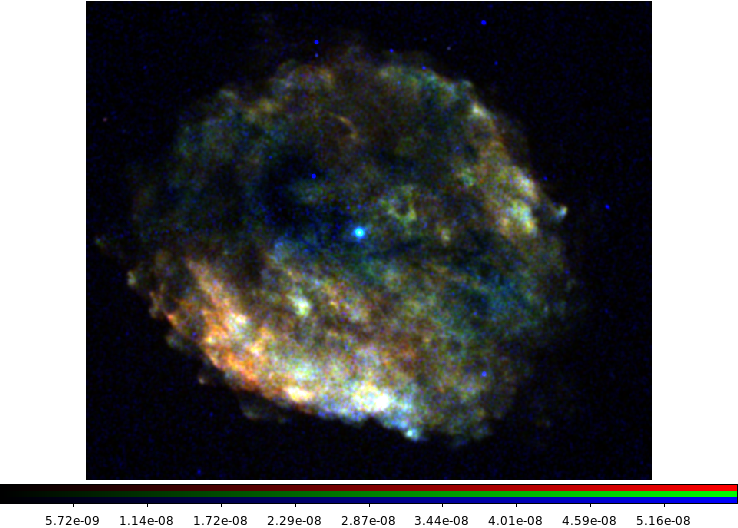

In [10]:
ds9 -scale mode 99.5 -smooth -rgb \
  -red rcw103_manual/soft_flux.img \
  -green rcw103_manual/medium_flux.img \
  -blue rcw103_manual/hard_flux.img \
  -zoom to fit -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png


# Cleanup


In [11]:
/bin/rm -rf 11823 12224
/bin/rm -f */*.asol */*.bpix */*.mask

for d in rcw103/* rcw103_manual/* 
do
  to=`echo $d | tr "/" "_"`
  mv -fv ${d} ${to}
done

rmdir rcw103 rcw103_manual 


'rcw103/11823_broad_flux.img' -> 'rcw103_11823_broad_flux.img'
'rcw103/11823_broad_thresh.expmap' -> 'rcw103_11823_broad_thresh.expmap'
'rcw103/11823_broad_thresh.img' -> 'rcw103_11823_broad_thresh.img'
'rcw103/11823_reproj_evt.fits' -> 'rcw103_11823_reproj_evt.fits'
'rcw103/12224_broad_flux.img' -> 'rcw103_12224_broad_flux.img'
'rcw103/12224_broad_thresh.expmap' -> 'rcw103_12224_broad_thresh.expmap'
'rcw103/12224_broad_thresh.img' -> 'rcw103_12224_broad_thresh.img'
'rcw103/12224_reproj_evt.fits' -> 'rcw103_12224_reproj_evt.fits'
'rcw103/broad_flux.img' -> 'rcw103_broad_flux.img'
'rcw103/broad_thresh.expmap' -> 'rcw103_broad_thresh.expmap'
'rcw103/broad_thresh.img' -> 'rcw103_broad_thresh.img'
'rcw103/merged_evt.fits' -> 'rcw103_merged_evt.fits'
'rcw103_manual/11823_broad_flux.img' -> 'rcw103_manual_11823_broad_flux.img'
'rcw103_manual/11823_broad_thresh.expmap' -> 'rcw103_manual_11823_broad_thresh.expmap'
'rcw103_manual/11823_broad_thresh.img' -> 'rcw103_manual_11823_broad_thresh.img'